In [1]:
from sarpy.load import sar_load
import matplotlib.pyplot as plt
import numpy as np

### Test if point have the same coordinate when loaded with window and with the foot print is adjusted

In [2]:
path = '/home/simon/Desktop/dev_sarpy/test_data/S1A_IW_GRDH_1SDV_20181009T171427_20181009T171452_024062_02A131_E887.SAFE'

In [3]:
test_big = sar_load(path,['VV'])

### Use the black corner as reference point

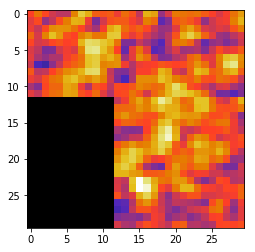

In [4]:
a=plt.imshow(test_big.bands[0][13170:13200:1,320:350:1],cmap = 'CMRmap',vmin=0,vmax=np.quantile(test_big.bands[0].reshape(-1),0.95))

In [5]:
test_big.bands[0][13170+12,320+11]

0

In [6]:
test_big.bands = None

### The get_coordinate and get_index are not consistened 

In [7]:
test_big.get_coordinate(13170+12,320+11)

(44.05012527677258, 8.262062308134348)

In [8]:
test_big.get_index(44.05012527677258, 8.262062308134348)

(13182, 328)

In [9]:
(13170+12,320+11)

(13182, 331)

### Try to load subset centered at the black corner

In [18]:
test1 = sar_load(path,['VV'],(44.05012527677258, 8.262062308134348),[20,20])

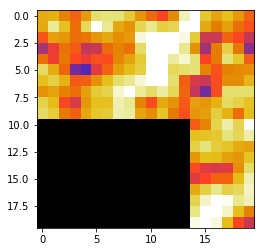

In [12]:
a=plt.imshow(test1.bands[0],cmap = 'CMRmap',vmin=0,vmax=np.quantile(test1.bands[0].reshape(-1),0.95))

### There is a slight offset from the center but the returned coordinate of the corner is the same

In [19]:
test1.get_coordinate(10,13),test_big.get_coordinate(13170+12,320+11)

((44.05012527677265, 8.262062308134322),
 (44.05012527677258, 8.262062308134348))

### The foot print is adjusted 

In [21]:
test1.get_coordinate(0,0),test1.get_coordinate(0,20),test1.get_coordinate(20,0),test1.get_coordinate(20,20)

((44.04900511850995, 8.260701380293792),
 (44.04934686915584, 8.263151978357444),
 (44.05080115804881, 8.260237411154046),
 (44.05114291045915, 8.262688082045473))

In [14]:
test1.footprint

{'latitude': array([44.04900512, 44.04934687, 44.05080116, 44.05114291]),
 'longitude': array([8.26070138, 8.26315198, 8.26023741, 8.26268808])}

In [22]:
test_big.footprint

{'latitude': array([44.361824, 44.762306, 43.262047, 42.860882]),
 'longitude': array([ 8.145285, 11.366317, 11.682298,  8.540959])}